In [15]:
# image classification neural network
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v2 as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

from os import listdir
import os
import cv2

Using TensorFlow backend.


In [2]:
# access to my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# unzip files
!unzip -uq "/content/drive/My Drive/tensor_flow/natural-images.zip"

In [0]:
# directory to the files
INPUT_PATH = "/content/data/natural_images/"
categories = ["airplane","car" ,"cat" ,"dog" ,"flower" ,"fruit","motorbike","person"]

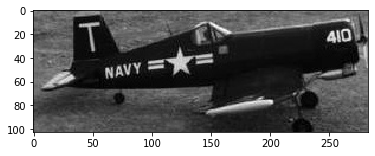

In [5]:
# check our images
for category in categories:
  path = os.path.join(INPUT_PATH,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap='gray')
    plt.show()
    break
  break


In [6]:
img_array.shape

(103, 283)

In [0]:
# train data
img_size = 100
training_data = []

def create_train_data():
  for category in categories:
    path = os.path.join(INPUT_PATH,category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(img_size,img_size))
      training_data.append([new_array,class_num])

create_train_data()
# shuffle training data
import random
random.shuffle(training_data)

In [0]:
# separating target, feature data
X = []
y = []
for feature,label in training_data:
  X.append(feature)
  y.append(label)

# converting into array
X = np.array(X).reshape(-1,img_size,img_size,1)

In [10]:
#shape of X,y
print(X.shape)
print(len(y))

(6899, 100, 100, 1)
6899


In [0]:
# # save data
# import pickle

# pickle_out = open('X.pickle','wb')
# pickle.dump(X,pickle_out)
# pickle_out.close()

# pickle_out = open('y.pickle','wb')
# pickle.dump(y,pickle_out)
# pickle_out.close()

In [0]:
X = pickle.load(open("X.pickle",'rb'))
y = pickle.load(open('y.pickle','rb'))

In [28]:
print('Feature data shape',X.shape)
print('Target data shape',len(y))

Feature data shape (6899, 100, 100, 1)
Target data shape 6899


In [0]:
# Label encoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# dummy_y = pd.DataFrame(encoded_Y)
# dummy_y = np.asfarray(dummy_y)

In [30]:
# target data 
encoded_Y = to_categorical(encoded_Y)
# check shape of the target
encoded_Y.shape

(6899, 8)

In [0]:
# data prep for model
X = X/255.0
# train, test
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [88]:
# build CNN
model = Sequential()
# first layer
model.add(Conv2D(16,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

# second layer
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

# third layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

# fourth layer
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

# first fully connected layer
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# second fully connected layer
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(8,activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 98, 98, 16)        160       
_________________________________________________________________
batch_normalization_24 (Batc (None, 98, 98, 16)        64        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
batch_normalization_25 (Batc (None, 47, 47, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 32)       

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [90]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Train on 5519 samples, validate on 1380 samples
Epoch 1/5
5519/5519 [==============================] - 81s 15ms/sample - loss: 1.9237 - acc: 0.3658 - val_loss: 3.2247 - val_acc: 0.1362
Epoch 2/5
5519/5519 [==============================] - 80s 14ms/sample - loss: 1.2419 - acc: 0.5662 - val_loss: 2.3673 - val_acc: 0.2529
Epoch 3/5
5519/5519 [==============================] - 79s 14ms/sample - loss: 0.9889 - acc: 0.6575 - val_loss: 1.3312 - val_acc: 0.5116
Epoch 4/5
5519/5519 [==============================] - 79s 14ms/sample - loss: 0.8560 - acc: 0.6972 - val_loss: 0.9632 - val_acc: 0.6493
Epoch 5/5
5519/5519 [==============================] - 79s 14ms/sample - loss: 0.7722 - acc: 0.7239 - val_loss: 0.8349 - val_acc: 0.6920


In [0]:
def plot_learningCurve(history,epoch):
  # plot traingin & validation accuracy vals
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['acc'])
  plt.plot(epoch_range,history.history['val_acc'])
  plt.title('Model Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  #plot traingin & validation loss_vals
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()



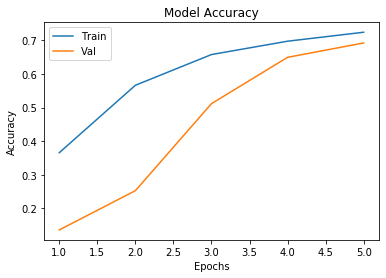

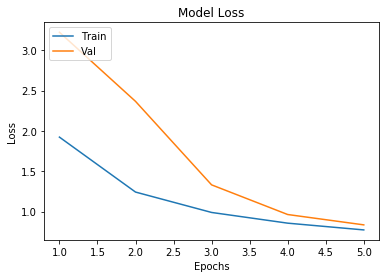

In [92]:
plot_learningCurve(history,5)

In [73]:
type(history)

tensorflow.python.keras.callbacks.History

In [74]:
print(history)

In [77]:
# history object
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])